In [1]:
#import required librabies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("50_Startups.csv")
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [2]:

print(data.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


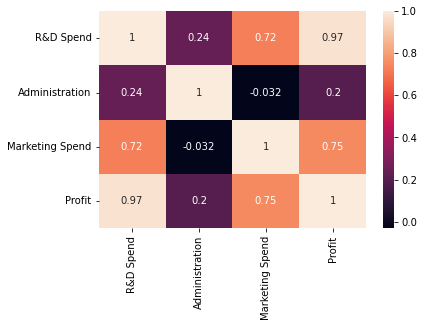

In [3]:
#check the correlation between independent variables
sns.heatmap(data.corr(), annot=True)
plt.show()

In [4]:
# assigning values for dependent and independent variables
x = data[["R&D Spend", "Administration", "Marketing Spend"]]
y = data["Profit"]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1) #changing the shape of y into 2D 



In [52]:
# import module for ML and regession
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

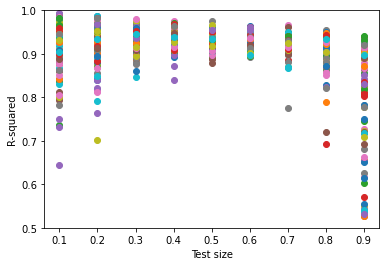

In [120]:
n_runs = 100 #number of random trials 
for i in range(n_runs):
    test_size_list = np.arange(0.1, 1.0, 0.1) #array of test size
    r2_scores = []
    for test in test_size_list:
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=test)
        model = LinearRegression()
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        r2 = r2_score(ytest, ypred)
        r2_scores.append(r2)
    plt.scatter(test_size_list, r2_scores, label=f'Run {i+1}')
plt.ylim(0.5,1)
plt.xlabel('Test size')
plt.ylabel('R-squared')
plt.show()

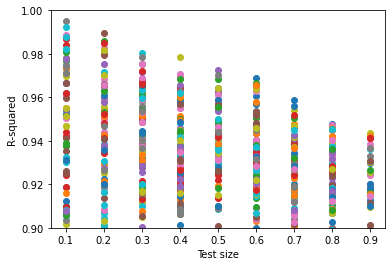

In [134]:
for i in range(n_runs):
    test_size_list = np.arange(0.1, 1.0, 0.1)
    r2_scores = []
    for test in test_size_list:
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=test)
        model = LinearRegression()
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        r2 = r2_score(ytest, ypred)
        r2_scores.append(r2)
    plt.scatter(test_size_list, r2_scores)
plt.ylim(0.9,1)
plt.xlabel('Test size')
plt.ylabel('R-squared')
plt.show()